In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv("flipkart_com-ecommerce_sample.csv")
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


## Data Exploration

In [3]:
print(df.info())
print("\nShape of Data:",df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [4]:
df.drop(['crawl_timestamp'],inplace=True,axis=1)

In [5]:
df.isnull().sum()

uniq_id                       0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [6]:
df.describe()

,retail_price,discounted_price
count,19922.000000,19922.000000
mean,2979.206104,1973.401767
std,9009.639341,7333.586040
min,35.000000,35.000000
25%,666.000000,350.000000
50%,1040.000000,550.000000
75%,1999.000000,999.000000
max,571230.000000,571230.000000


In [7]:
print("Unique Customers: ",df.uniq_id.nunique())
print("Unique Products: ",df.pid.nunique())

Unique Customers:  20000
Unique Products:  19998


In [8]:
df['brand'].count()

14136

Text(0.5, 1.0, 'Number of products of each brand')

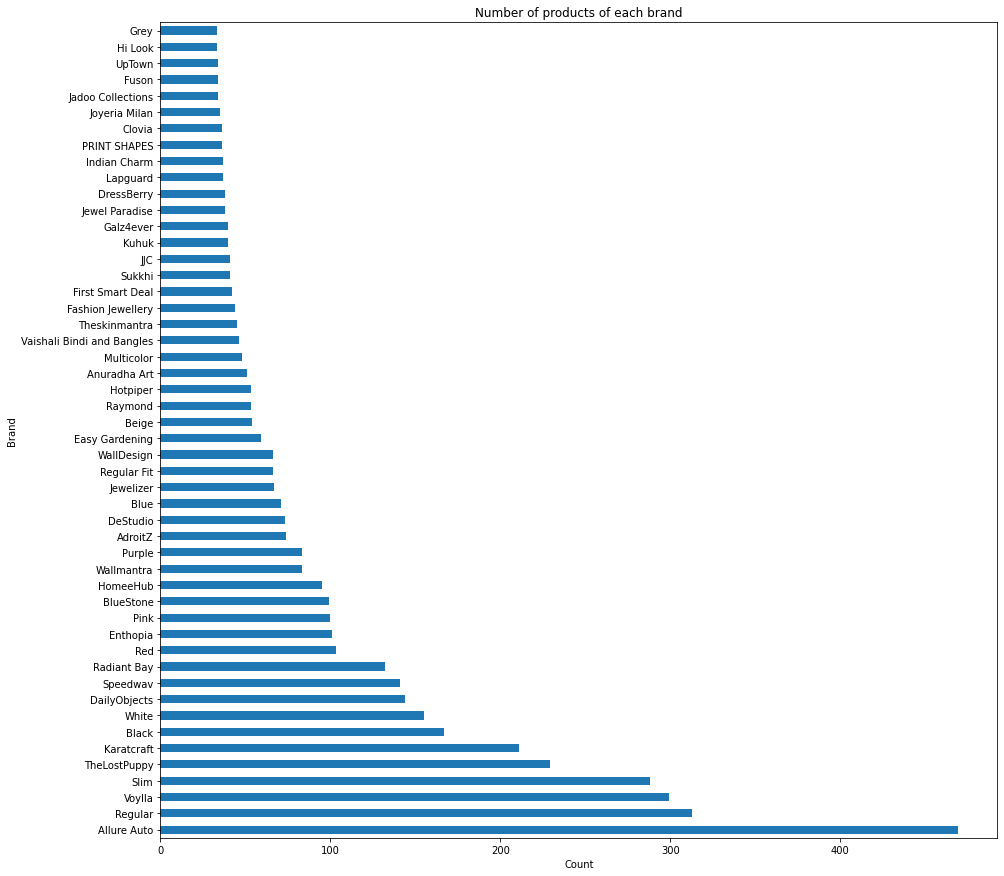

In [9]:
import matplotlib.pyplot as plt
df['brand'].value_counts()[0:50].plot(kind='barh',figsize=(15,15))
plt.xlabel('Count')
plt.ylabel('Brand')
plt.title('Number of products of each brand')

In [10]:
import re
import nltk
from nltk import pos_tag, word_tokenize, PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer #used to transform a given text into a vector on the basis of the 
                                                                      #frequency (count) of each word that occurs in the entire text
wordnet_lemmatizr=WordNetLemmatizer()

In [11]:
! pip install termcolor
from termcolor import colored

In [12]:
def clean_product_type(dataframe):
    document=list(dataframe['product_category_tree'])
    product_types=[re.findall(r'\"(.*?)\"', sentence) for sentence in document]
    product_types=[' '.join(listed_items) for listed_items in product_types]
    return(product_types)

In [13]:
def clean_categories(dataframe):
    document=list(dataframe['product_category_tree'].values)
    categories=[re.findall(r'name=(.*?)}',sentence) for sentence in document]
    categories=[' '.join(word) for word in categories]
    return(categories)

In [14]:
def special_characters_cleaning(document):
    sentences=[]
    for sentence in document:
        sentences.append(re.sub('[^a-zA-Z0-9\n\.]',' ',str(sentence)))
    return(sentences)

In [15]:
def lemmetize_document(document):
    sentences=[]
    for sentence in document:
        words=[wordnet_lemmatizer.lemmatize(word)for word in word_tokenize(sentence)]
        sentences.append(' '.join(words))
    return(sentences)

In [16]:
def product_category_extraction(df):
    product_category=[word for item in dataframe['categories']for word in item.split()]
    product_category=list(set(product_category))
    return(product_category)

In [17]:
def save_product_category(dataframe):
    pass

In [18]:
def pre_processing_document(document):
    document=special_characters_cleaning(document)
    document=lemmetize_document(document)
    document=[sentence.title() for sentence in document]
    return(document)

In [19]:
def extract_categories_from_description(document,product_category):
    extracted_product_category=[]
    for sentence in document:
        extracted_product_category.append(' '.join(set(product_category).intersection(set(word_tokenize(sentence)))))
    return(extracted_product_category)   

In [20]:
lemmetize=WordNetLemmatizer()
stemmer=PorterStemmer()

In [21]:
df['product'] = clean_product_type(df)

In [22]:
df["categories"]=clean_categories(df)

In [23]:
lemmetize.lemmatize('Clothing')

'Clothing'

In [24]:
stemmer.stem('Clothing')

'cloth'

In [25]:
categories= list(set(df['product_category_tree'].values))
categories= [item.split() for item in df['product_category_tree']]
categories= [word.lower() for listed_item in categories for word in listed_item]
categories= list(set(categories))

In [26]:
df.head()

,uniq_id,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,product,categories
0,c2d766ca982eca8304150849735ffef9,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...","Clothing >> Women's Clothing >> Lingerie, Slee...",
1,7f7036a6d550aaa89d34c77bd39a5e48,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",Furniture >> Living Room Furniture >> Sofa Bed...,
2,f449ec65dcbc041b6ae5e6a32717d01b,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",Footwear >> Women's Footwear >> Ballerinas >> ...,
3,0973b37acd0c664e3de26e97e5571454,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...","Clothing >> Women's Clothing >> Lingerie, Slee...",
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",Pet Supplies >> Grooming >> Skin & Coat Care >...,


In [27]:
df['detailed_description']= df['product_category_tree']+df['brand']+df['product_name']
df['detailed_description']

0        ["Clothing >> Women's Clothing >> Lingerie, Sl...
1        ["Furniture >> Living Room Furniture >> Sofa B...
2        ["Footwear >> Women's Footwear >> Ballerinas >...
3        ["Clothing >> Women's Clothing >> Lingerie, Sl...
4        ["Pet Supplies >> Grooming >> Skin & Coat Care...
                               ...                        
19995    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19996    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19997    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19998    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19999    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
Name: detailed_description, Length: 20000, dtype: object

In [28]:
document=list(df['detailed_description'].values)
document= special_characters_cleaning(document)

In [29]:
def stopwods_document(document):
    filtered_sent=[]
    for word in word_tokenize:
        if word not in stop_words:
            filtered_sent.append(word)
    return(document)

In [30]:
document

['  Clothing    Women s Clothing    Lingerie  Sleep   Swimwear    Shorts    Alisha Shorts    Alisha Solid Women s Cycling Shorts  AlishaAlisha Solid Women s Cycling Shorts',
 '  Furniture    Living Room Furniture    Sofa Beds   Futons    FabHomeDecor Fabric Double Sofa Bed  Finish Colo...  FabHomeDecorFabHomeDecor Fabric Double Sofa Bed',
 '  Footwear    Women s Footwear    Ballerinas    AW Bellies  AWAW Bellies',
 '  Clothing    Women s Clothing    Lingerie  Sleep   Swimwear    Shorts    Alisha Shorts    Alisha Solid Women s Cycling Shorts  AlishaAlisha Solid Women s Cycling Shorts',
 '  Pet Supplies    Grooming    Skin   Coat Care    Shampoo    Sicons All Purpose Arnica Dog Shampoo  500 ml   SiconsSicons All Purpose Arnica Dog Shampoo',
 '  Eternal Gandhi Super Series Crystal Paper Weight...  Eternal GandhiEternal Gandhi Super Series Crystal Paper Weights  with Silver Finish',
 '  Clothing    Women s Clothing    Lingerie  Sleep   Swimwear    Shorts    Alisha Shorts    Alisha Solid Wo

In [31]:
tfidf=TfidfVectorizer(stop_words='english',vocabulary = categories) #Convert a collection of raw documents to a matrix of TF-IDF features
data=tfidf.fit_transform(document)
data

<20000x9323 sparse matrix of type '<class 'numpy.float64'>'
	with 134254 stored elements in Compressed Sparse Row format>

In [32]:
m = pd.DataFrame(data.todense(),columns=tfidf.vocabulary) #Convert the tokenized data into a dataframe
m

,orico,pure,236,chowki,palito,"(6...""]",mom,hemali,relief,"tanmaniya""]",...,wing,mate,plo,martin,77306,vivaa,"100)""]",prachin,"badge""]","10)""]"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
from sklearn.neighbors import NearestNeighbors
nn=NearestNeighbors(algorithm='brute',n_neighbors=12).fit(data)
nn

NearestNeighbors(algorithm='brute', n_neighbors=12)

In [34]:
text= df[df['brand']== "Sicons"]['detailed_description'].values
result = nn.kneighbors(tfidf.transform(text))
for col in tfidf.transform(text).nonzero()[1]:
    print(tfidf.get_feature_names()[col], ' - ', tfidf.transform(text)[0, col])

500  -  0.1755580634873606
grooming  -  0.18843570651816263
supplies  -  0.11655519956636937
pet  -  0.1365067421145578
skin  -  0.13934466509591426
sicons  -  0.2085104473418128
purpose  -  0.32590516349692755
shampoo  -  0.5799734764320892
ml  -  0.13570266279588009
dog  -  0.3562770738924936
care  -  0.09489217637373835
coat  -  0.20362166171594565
arnica  -  0.44739280507919155
grooming  -  0.18843570651816263
supplies  -  0.11655519956636937
tree  -  0.0
pet  -  0.1365067421145578
skin  -  0.13934466509591426
sicons  -  0.2085104473418128
purpose  -  0.32590516349692755
shampoo  -  0.5799734764320892
200  -  0.0
ml  -  0.13570266279588009
dog  -  0.3562770738924936
care  -  0.09489217637373835
coat  -  0.20362166171594565
tea  -  0.0
grooming  -  0.18843570651816263
supplies  -  0.11655519956636937
conditioning  -  0.0
pet  -  0.1365067421145578
skin  -  0.13934466509591426
sicons  -  0.2085104473418128
conditoner  -  0.0
shampoo  -  0.5799734764320892
200  -  0.0
ml  -  0.1357026

C:\Users\nampa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [35]:
for item in result[1][0]:
    print(colored(df.iloc[item]['product_category_tree'].upper(), 'red'), ':', document[item])

["PET SUPPLIES >> GROOMING >> SKIN & COAT CARE >> SHAMPOO >> SICONS ALL PURPOSE ARNICA DOG SHAMPOO (500 ML)"] :   Pet Supplies    Grooming    Skin   Coat Care    Shampoo    Sicons All Purpose Arnica Dog Shampoo  500 ml   SiconsSicons All Purpose Arnica Dog Shampoo
["PET SUPPLIES >> GROOMING >> SKIN & COAT CARE >> SHAMPOO >> SICONS ALL PURPOSE TEA TREE DOG SHAMPOO (200 ML)"] :   Pet Supplies    Grooming    Skin   Coat Care    Shampoo    Sicons All Purpose Tea Tree Dog Shampoo  200 ml   SiconsSicons All Purpose Tea Tree Dog Shampoo
["PET SUPPLIES >> GROOMING >> SKIN & COAT CARE >> SHAMPOO >> SICONS CONDITIONING CONDITONER DOG SHAMPOO (200 ML)"] :   Pet Supplies    Grooming    Skin   Coat Care    Shampoo    Sicons Conditioning Conditoner Dog Shampoo  200 ml   SiconsSicons Conditioning Conditoner Dog Shampoo
["CLOTHING >> MEN'S CLOTHING >> T-SHIRTS >> NINJA TURTLE T-SHIRTS"] : nan
["CLOTHING >> MEN'S CLOTHING >> T-SHIRTS >> NIMYA T-SHIRTS"] : nan
["CLOTHING >> MEN'S CLOTHING >> T-SHIRTS >>

In [36]:
text1= df[df['brand']== "AW"]['detailed_description'].values
result1 = nn.kneighbors(tfidf.transform(text1))
for col in tfidf.transform(text1).nonzero()[1]:
    print(tfidf.get_feature_names()[col], ' - ', tfidf.transform(text1)[0, col])

bellies  -  0.6563955671720111
footwear  -  0.48355263995026543
women  -  0.14708749625340317
aw  -  0.44338303545123986
ballerinas  -  0.342196516805786
usb  -  0.0
accessories  -  0.0
cable  -  0.0
speed  -  0.0
high  -  0.0
aw  -  0.44338303545123986
iphone  -  0.0
cables  -  0.0
mobile  -  0.0
sync  -  0.0
lightning  -  0.0
charge  -  0.0
usb  -  0.0
accessories  -  0.0
cable  -  0.0
high  -  0.0
aw  -  0.44338303545123986
iphone  -  0.0
cables  -  0.0
mobile  -  0.0
plus  -  0.0
power  -  0.0
lightning  -  0.0
usb  -  0.0
accessories  -  0.0
cable  -  0.0
high  -  0.0
aw  -  0.44338303545123986
iphone  -  0.0
cables  -  0.0
mobile  -  0.0
power  -  0.0
lightning  -  0.0
usb  -  0.0
accessories  -  0.0
cable  -  0.0
speed  -  0.0
high  -  0.0
aw  -  0.44338303545123986
iphone  -  0.0
cables  -  0.0
mobile  -  0.0
plus  -  0.0
sync  -  0.0
lightning  -  0.0
charge  -  0.0


In [37]:
for item1 in result1[1][0]:
    print(colored(df.iloc[item1]['brand'].upper(), 'red'), ':', document[item1])

AW :   Footwear    Women s Footwear    Ballerinas    AW Bellies  AWAW Bellies
INC.5 :   Footwear    Women s Footwear    Ballerinas    Inc.5 Bellies  Inc.5Inc.5 Bellies
DRESSBERRY :   Footwear    Women s Footwear    Ballerinas    DressBerry Bellies  DressBerryDressBerry Bellies
BOOTWALE :   Footwear    Women s Footwear    Ballerinas    Bootwale Bellies  BootwaleBootwale Bellies
BOOTWALE :   Footwear    Women s Footwear    Ballerinas    Bootwale Bellies  BootwaleBootwale Bellies
BOOTWALE :   Footwear    Women s Footwear    Ballerinas    Bootwale Bellies  BootwaleBootwale Bellies
BOOTWALE :   Footwear    Women s Footwear    Ballerinas    Bootwale Bellies  BootwaleBootwale Bellies
BOOTWALE :   Footwear    Women s Footwear    Ballerinas    Bootwale Bellies  BootwaleBootwale Bellies
SHOPOJ :   Footwear    Women s Footwear    Ballerinas    SHOPOJ Women Bellies  SHOPOJSHOPOJ Women Bellies
SHOPOJ :   Footwear    Women s Footwear    Ballerinas    SHOPOJ Women Bellies  SHOPOJSHOPOJ Women Bellies
